Image edge detection is a fundamental technique in image processing used to identify boundaries within an image. These boundaries typically correspond to edges where there is a significant change in intensity or color between neighboring pixels. Edge detection algorithms aim to highlight these transitions, making it easier to analyze and interpret the content of an image. Here's a simplified explanation of how edge detection works:

1. **Grayscale Conversion**: The first step in many edge detection algorithms is converting the image to grayscale. This simplifies the image processing by reducing it to a single channel (intensity), making it easier to detect edges.

2. **Gradient Calculation**: The gradient of an image measures the change in intensity or color at each pixel's location. The gradient magnitude represents the rate of change, while the gradient direction indicates the direction of the steepest change. Common methods for computing gradients include the Sobel, Prewitt, and Roberts operators.

3. **Edge Enhancement**: After computing the gradient, the next step involves enhancing the edges to make them more prominent. This can be achieved by applying filters or convolution masks to the gradient image. These filters highlight areas of high gradient magnitude, which typically correspond to edges.

4. **Thresholding**: Thresholding is applied to the edge-enhanced image to distinguish between edge pixels and non-edge pixels. Pixels with gradient magnitudes above a certain threshold are considered edge pixels, while those below the threshold are discarded. This step helps remove noise and retain only the most significant edges.

5. **Edge Linking**: In some cases, the edges detected may not form continuous lines but rather fragmented segments. Edge linking algorithms are used to connect these segments into coherent edges or contours. This process involves examining neighboring pixels and determining whether they belong to the same edge.

6. **Post-processing**: Finally, post-processing techniques may be applied to refine the detected edges further. This could involve smoothing the edges, removing small or spurious edge fragments, or performing additional analysis based on the detected edges.

Different edge detection algorithms may vary in their specific implementation details, but they generally follow these fundamental steps to identify and highlight edges in an image. Edge detection is a critical component of many computer vision tasks, including object detection, image segmentation, and feature extraction.

In [16]:
import cv2
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

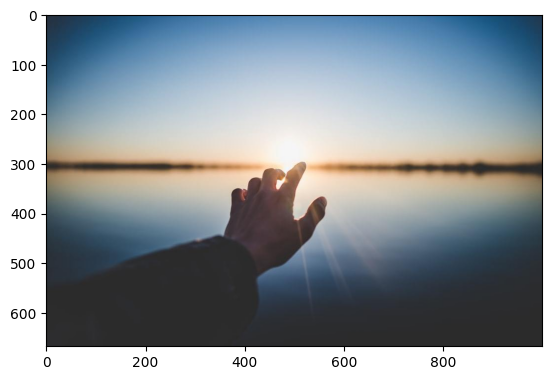

In [17]:
# Path to the input image
image_path = "sample.png"

# Display the original and edge-detected images
originalImg = cv2.imread("sample.png")
currentImg = originalImg
show_image(currentImg)

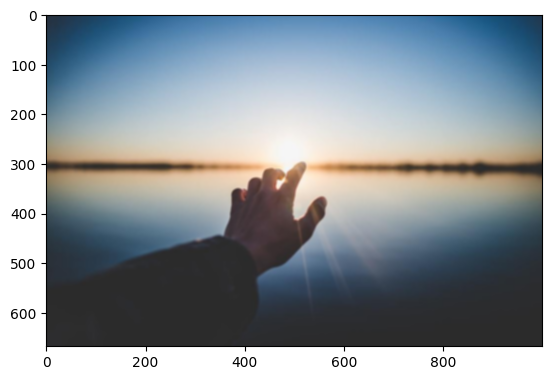

In [18]:
# Gaussian Blur
def gaussian_blur(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
    return cv2.filter2D(image, -1, kernel)

currentImg = gaussian_blur(currentImg, 5)
show_image(currentImg)

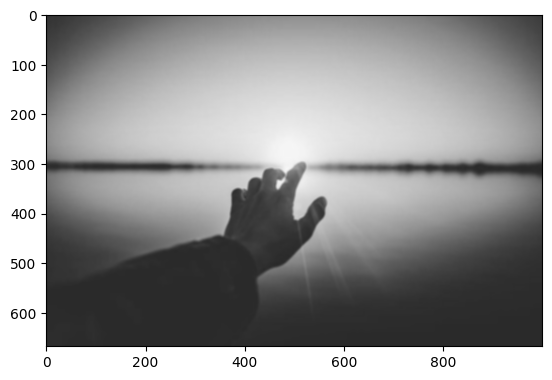

In [19]:
#Grayscale image
def grayscale(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i][j] = np.dot(image[i][j], [0.2989, 0.5870, 0.1140])
    return image

currentImg = grayscale(currentImg)
show_image(currentImg)

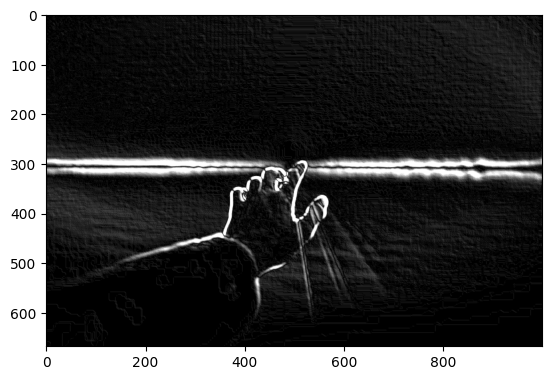

In [20]:
# Gradient calculation
def sobel_filters(image):
    # Compute gradients along the X and Y axis using the Sobel operator
    gradX = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
    # Subtract the Y-gradient from the X-gradient
    gradient = cv2.subtract(gradX, gradY)
    # Scale the gradient values to the range [0, 255]
    gradient = cv2.convertScaleAbs(gradient)
    return gradient


currentImg = sobel_filters(currentImg)
show_image(currentImg)

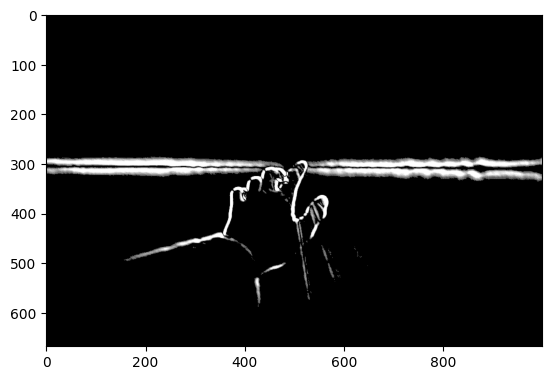

In [21]:
# Thresholding
def threshold(image, minVal, maxVal):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                if image[i][j][k] < minVal:
                    image[i][j][k] = 0
                elif image[i][j][k] > maxVal:
                    image[i][j][k] = 255
    return image

currentImg = threshold(currentImg, 80, 255)
show_image(currentImg)

In [22]:
currentImg

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)